In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
 
digits = datasets.load_digits(n_class=6)
# 该数据集是sklearn.datasets中内置的手写数字图片数据集，这是一个研究图像分类算法的优质数据集。
 
X, y = digits.data, digits.target
n_samples, n_features = X.shape
 
'''显示原始数据'''
n = 20  # 每行20个数字，每列20个数字
img = np.zeros((10 * n, 10 * n))
for i in range(n):
    ix = 10 * i + 1
    for j in range(n):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n + j].reshape((8, 8))
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
'''t-SNE'''
tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
X_tsne = tsne.fit_transform(X)


/data/yutingh/miniconda3/envs/exp/lib/python3.9/site-packages/scikit_learn-1.1.2-py3.9-linux-x86_64.egg/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/data/yutingh/miniconda3/envs/exp/lib/python3.9/site-packages/scikit_learn-1.1.2-py3.9-linux-x86_64.egg/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


array([[ 20.53374  , -46.909782 ],
       [  5.263121 ,  34.272552 ],
       [ -6.9846926,  29.956549 ],
       ...,
       [ 31.282656 ,  15.295594 ],
       [ 33.63236  ,  14.099868 ],
       [ 20.034683 , -36.969093 ]], dtype=float32)

Org data dimension is 64. Embedded data dimension is 2


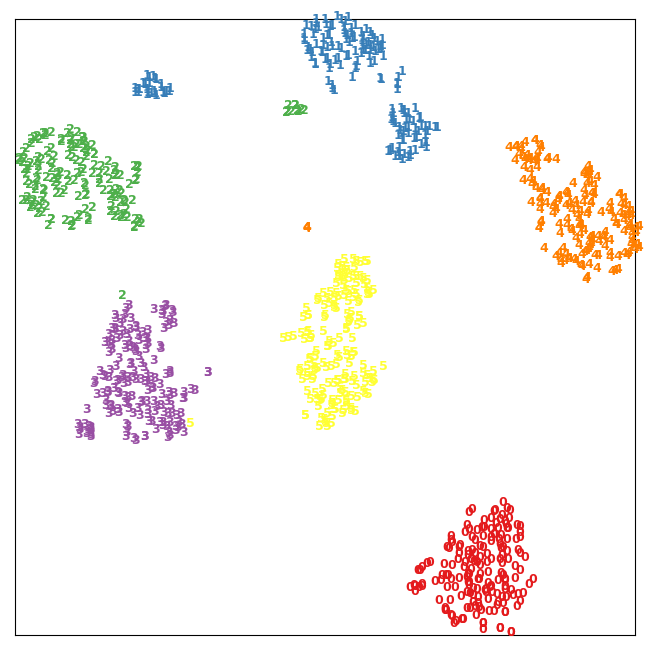

In [21]:
print("Org data dimension is {}. Embedded data dimension is {}".format(X.shape[-1], X_tsne.shape[-1]))
 
'''嵌入空间可视化'''
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
# print(x_min, x_max)
X_norm = (X_tsne - x_min) / (x_max - x_min)  # 归一化
# print(X_norm)
plt.figure(figsize=(8, 8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]), color=plt.cm.Set1(y[i]), 
             fontdict={'weight': 'bold', 'size': 9})
    # plt.cm.Set1 返回一种颜色
plt.xticks([])
plt.yticks([])
plt.show()

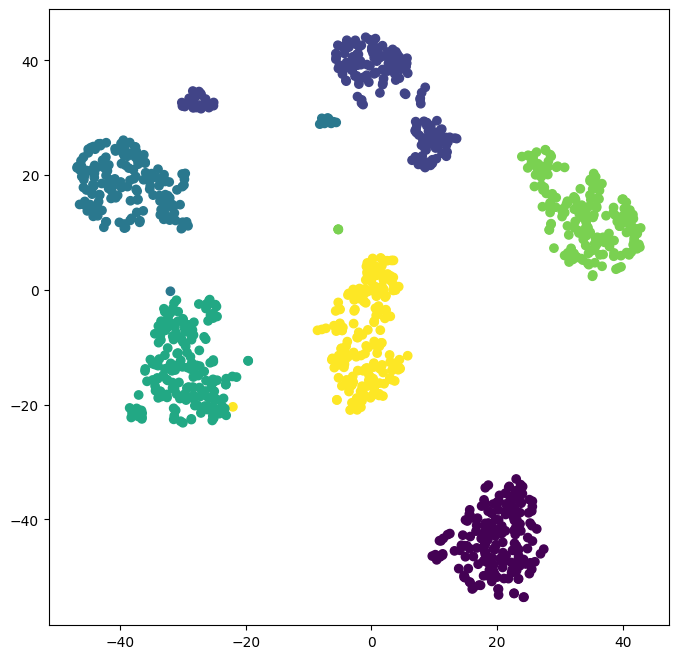

In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(x=X_tsne[:,0], y=X_tsne[:,1],c=y,cmap="viridis")


In [ ]:
x=[]
y=[]
u= list(utrait.values())
u.sort()

for i in range(int((max(u)-min(u))/0.1)):
    t_min=min(u)+i*0.1
    t_max=t_min+0.1
    x.append(t_min)
    tmp=0
    for theta in u:
        if theta>=t_min and theta< t_max :
            print(theta)
            tmp+=1
    y.append(tmp)
    # print(t_min, t_max)
    # break
plt.bar(x, y)

In [ ]:
# k=20
# i_label={}
# for theta,top_k in zip(utrait.values(), k_info):
#     for q in top_k[:k]:
#         if q in i_label:
#             i_label[q].append(theta)
#         else:
#             i_label[q]=[theta]
# print(len(i_label.keys()))
# for k,v in i_label.items():
#     print(k,len(v))
    

In [ ]:

                # # if epoch_i<epoch*self.warmp_up_ratio:
                # #     continue
                # with torch.no_grad():
                #     self.model.eval()
                #     tmp = list(zip(score.tolist(),item_pool.keys()))
                #     tmp_sorted = sorted(tmp, reverse=True)
                #     q_ = item_pool[tmp_sorted[0][1]]
                #     # q_ = torch.tensor(item_pool[tmp_sorted[0][1]]).to(self.device)
                #     s_data.append([utrait[0].tolist(),q_])
                #     self.model.train()
                    
                # if len(s_data) == self.batch_size:
                #     u_i=[]
                #     u_j=[]
                #     q_i=[]
                #     q_j=[]
                #     for i in range(self.batch_size):
                #         for j in range(i+1,self.batch_size):
                #             if s_data[i][1]==s_data[j][1]:
                #                 continue
                #             # i_ = self.model.itn(q_)
                #             u_i.append(s_data[i][0]) 
                #             u_j.append(s_data[j][0])
                #             q_i.append(s_data[i][1])
                #             q_j.append(s_data[j][1])
                #     # s_loss: torch.Tensor  = torch.tensor(0.).to(self.device)
                #     u_i:torch.Tensor = torch.tensor(u_i).to(self.device)
                #     u_j:torch.Tensor = torch.tensor(u_j).to(self.device)
                #     qi:torch.Tensor = torch.tensor(q_i).to(self.device)
                #     qj:torch.Tensor = torch.tensor(q_j).to(self.device)
                #     qi = self.model.itn(qi)
                #     qj = self.model.itn(qj)
                #     s_loss = (self.l*((u_i-u_j)**2).sum(dim=-1)-((qi-qj)**2).sum(dim=-1)).sum()
                #     # e_loss=self.b*s_loss/d_loss
                #     optimizer.zero_grad()
                #     s_loss.backward()
                #     optimizer.step()
                #     s_data=[]